### STEP 1) IMPORTING LIBRARIES

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing,metrics,linear_model
from sklearn.metrics import mean_squared_log_error, r2_score
from sklearn.model_selection import cross_val_score
import math
from sklearn.preprocessing import OneHotEncoder

### STEP 2) READING DATA

In [111]:
data=pd.read_excel(r"ToyotaCorolla.xlsx")
data.head(5)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [112]:
data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfg_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

### STEP 3) EDA

### 3.1) CHECKING SHAPE OF DATA

In [113]:
data.shape

(1436, 38)

### 3.2) DATA TYPE CHECK

In [114]:
data.dtypes

Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
CC                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfg_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
T

#### Datatypes don't require any changes

### 3.3) DUPLICATE DATA

In [115]:
data[data.duplicated(subset=['Price','Age_08_04','KM','HP','CC','Doors','Gears','Quarterly_Tax','Weight'])]

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
113,115,TOYOTA Corolla VERSO 2.0 D4D LINEA SOL MPV,24950,8,1,2004,13253,Diesel,116,1,...,1,1,1,0,0,0,0,0,0,0


#### We can see that there was a duplicate row 113 so we dropped it from our dataset

In [116]:
data=data.drop(data.index[[113]])
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


#### The row which was a duplicate has been removed

### 3.4) CHARACTERISTICS OF DATA

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1435 non-null   int64 
 1   Model             1435 non-null   object
 2   Price             1435 non-null   int64 
 3   Age_08_04         1435 non-null   int64 
 4   Mfg_Month         1435 non-null   int64 
 5   Mfg_Year          1435 non-null   int64 
 6   KM                1435 non-null   int64 
 7   Fuel_Type         1435 non-null   object
 8   HP                1435 non-null   int64 
 9   Met_Color         1435 non-null   int64 
 10  Color             1435 non-null   object
 11  Automatic         1435 non-null   int64 
 12  CC                1435 non-null   int64 
 13  Doors             1435 non-null   int64 
 14  Cylinders         1435 non-null   int64 
 15  Gears             1435 non-null   int64 
 16  Quarterly_Tax     1435 non-null   int64 
 17  Weight            1

In [118]:
data.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.00000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,...,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,721.977700,10720.915679,55.980488,5.551916,1999.62230,68571.782578,101.491986,0.674564,0.055749,1576.560976,...,0.579791,0.561672,0.977700,0.146341,0.257143,0.300348,0.770732,0.204878,0.145645,0.278049
std,416.313844,3608.732978,18.563312,3.353102,1.53692,37491.094553,14.981408,0.468701,0.229517,424.387533,...,0.493764,0.496355,0.147708,0.353571,0.437211,0.458569,0.420509,0.403753,0.352873,0.448194
min,1.000000,4350.000000,1.000000,1.000000,1998.00000,1.000000,69.000000,0.000000,0.000000,1300.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,362.500000,8450.000000,44.000000,3.000000,1998.00000,43000.000000,90.000000,0.000000,0.000000,1400.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,722.000000,9900.000000,61.000000,5.000000,1999.00000,63451.000000,110.000000,1.000000,0.000000,1600.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.500000,11950.000000,70.000000,8.000000,2001.00000,87041.500000,110.000000,1.000000,0.000000,1600.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.00000,243000.000000,192.000000,1.000000,1.000000,16000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3.5) MISSING VALUES CHECK

In [119]:
data.isnull().any()

Id                  False
Model               False
Price               False
Age_08_04           False
Mfg_Month           False
Mfg_Year            False
KM                  False
Fuel_Type           False
HP                  False
Met_Color           False
Color               False
Automatic           False
CC                  False
Doors               False
Cylinders           False
Gears               False
Quarterly_Tax       False
Weight              False
Mfg_Guarantee       False
BOVAG_Guarantee     False
Guarantee_Period    False
ABS                 False
Airbag_1            False
Airbag_2            False
Airco               False
Automatic_airco     False
Boardcomputer       False
CD_Player           False
Central_Lock        False
Powered_Windows     False
Power_Steering      False
Radio               False
Mistlamps           False
Sport_Model         False
Backseat_Divider    False
Metallic_Rim        False
Radio_cassette      False
Tow_Bar             False
dtype: bool

#### No missing values found

### 3.6) UNIQUE VALUES CHECK

In [120]:
data.nunique()

Id                  1435
Model                371
Price                236
Age_08_04             77
Mfg_Month             12
Mfg_Year               7
KM                  1263
Fuel_Type              3
HP                    12
Met_Color              2
Color                 10
Automatic              2
CC                    13
Doors                  4
Cylinders              1
Gears                  4
Quarterly_Tax         13
Weight                59
Mfg_Guarantee          2
BOVAG_Guarantee        2
Guarantee_Period       9
ABS                    2
Airbag_1               2
Airbag_2               2
Airco                  2
Automatic_airco        2
Boardcomputer          2
CD_Player              2
Central_Lock           2
Powered_Windows        2
Power_Steering         2
Radio                  2
Mistlamps              2
Sport_Model            2
Backseat_Divider       2
Metallic_Rim           2
Radio_cassette         2
Tow_Bar                2
dtype: int64

### 3.7) TRANSFORMATION OF CATEGORICAL VARIABLES

#### We will transform the below categorical variables by one hot encoding

### 3.7.1) Fuel_Type

In [121]:
data['Fuel_Type'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [122]:
one_hot = pd.get_dummies(data['Fuel_Type'])
data = data.drop('Fuel_Type',axis = 1)
data = data.join(one_hot)

### 3.7.2) Color

In [123]:
data['Color'].unique()

array(['Blue', 'Silver', 'Black', 'White', 'Grey', 'Red', 'Green',
       'Yellow', 'Violet', 'Beige'], dtype=object)

In [124]:
one_hot = pd.get_dummies(data['Color'])
data = data.drop('Color',axis = 1)
data = data.join(one_hot)

### 3.7.3) Mfg_Year

In [125]:
data['Mfg_Year'].unique()

array([2002, 2003, 2004, 2001, 2000, 1999, 1998], dtype=int64)

In [126]:
one_hot = pd.get_dummies(data['Mfg_Year'])
data = data.drop('Mfg_Year',axis = 1)
data = data.join(one_hot)

#### Replacing True and False with 1 and O and converting them to int64

In [127]:
data.columns

Index([              'Id',            'Model',            'Price',
              'Age_08_04',        'Mfg_Month',               'KM',
                     'HP',        'Met_Color',        'Automatic',
                     'CC',            'Doors',        'Cylinders',
                  'Gears',    'Quarterly_Tax',           'Weight',
          'Mfg_Guarantee',  'BOVAG_Guarantee', 'Guarantee_Period',
                    'ABS',         'Airbag_1',         'Airbag_2',
                  'Airco',  'Automatic_airco',    'Boardcomputer',
              'CD_Player',     'Central_Lock',  'Powered_Windows',
         'Power_Steering',            'Radio',        'Mistlamps',
            'Sport_Model', 'Backseat_Divider',     'Metallic_Rim',
         'Radio_cassette',          'Tow_Bar',              'CNG',
                 'Diesel',           'Petrol',            'Beige',
                  'Black',             'Blue',            'Green',
                   'Grey',              'Red',           'Silv

In [128]:
columns_to_transform = ['Diesel','Petrol','CNG',2002,2003,2004,2001,2000,1999,1998,
'Blue','Silver','Black','White','Grey','Red','Green','Yellow','Violet','Beige']
data[columns_to_transform] = data[columns_to_transform].replace({True: 1, False: 0})
data[columns_to_transform] = data[columns_to_transform].astype('int64')


In [129]:
data[columns_to_transform].dtypes

Diesel    int64
Petrol    int64
CNG       int64
2002      int64
2003      int64
2004      int64
2001      int64
2000      int64
1999      int64
1998      int64
Blue      int64
Silver    int64
Black     int64
White     int64
Grey      int64
Red       int64
Green     int64
Yellow    int64
Violet    int64
Beige     int64
dtype: object

In [130]:
data.columns = data.columns.astype(str)

### STEP 4) VISUALIZATION AND FEATURE SELECTION

#### Removing ID,Model and Cylinders since they won't have any effect on the Coorelation matrix

In [131]:
data=data.drop(['Id','Model','Cylinders'],axis=1)

In [132]:
data.shape

(1435, 52)

### 4.1)Pearson Coorelation Matrix for feature selection in numeric data 

#### Pearson method is used when the data is numeric

#### Extracting Numerical features

In [133]:
data1=data[["Price","Age_08_04","KM","HP","CC","Quarterly_Tax","Weight","Guarantee_Period"]]
data1

,Price,Age_08_04,KM,HP,CC,Quarterly_Tax,Weight,Guarantee_Period
0,13500,23,46986,90,2000,210,1165,3
1,13750,23,72937,90,2000,210,1165,3
2,13950,24,41711,90,2000,210,1165,3
3,14950,26,48000,90,2000,210,1165,3
4,13750,30,38500,90,2000,210,1170,3
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,69,1025,3
1432,10845,72,19000,86,1300,69,1015,3
1433,8500,71,17016,86,1300,69,1015,3
1434,7250,70,16916,86,1300,69,1015,3


<Axes: >

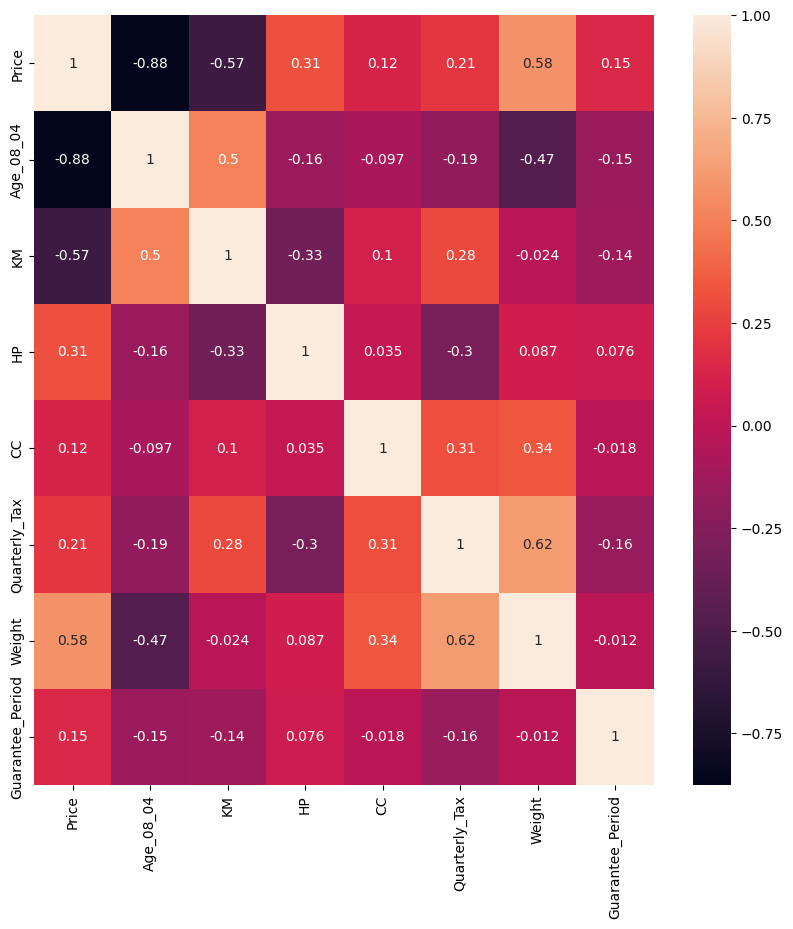

In [134]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(data1.corr(method ='pearson'),annot=True)

#### Selecting Features with having Coorelation greater than absolute(0.5) with Price 

In [135]:
#Correlation with output variable
cor = data1.corr()
cor_target = abs(cor["Price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Price        1.000000
Age_08_04    0.876273
KM           0.569420
Weight       0.575869
Name: Price, dtype: float64

#### Checking coorelation between the selected features so that if it's above 0.8 then we will discard one of them

In [136]:
df=data[['Age_08_04','KM','Weight','Price']]
df.corr()

,Age_08_04,KM,Weight,Price
Age_08_04,1.000000,0.504575,-0.466484,-0.876273
KM,0.504575,1.000000,-0.023969,-0.569420
Weight,-0.466484,-0.023969,1.000000,0.575869
Price,-0.876273,-0.569420,0.575869,1.000000


#### We have extracted Age_08_04,KM and Weight as numerical features

### 4.2) Kendall Coorelation Matrix for feature selection in ordinal categorical data 

#### Kendall method is used when the data is categorical(orinal) and numeric

#### Extracting Categorical(Ordinal) features

In [137]:
data2=data[["Doors","Gears","Price"]]
data2

,Doors,Gears,Price
0,3,5,13500
1,3,5,13750
2,3,5,13950
3,3,5,14950
4,3,5,13750
...,...,...,...
1431,3,5,7500
1432,3,5,10845
1433,3,5,8500
1434,3,5,7250


<Axes: >

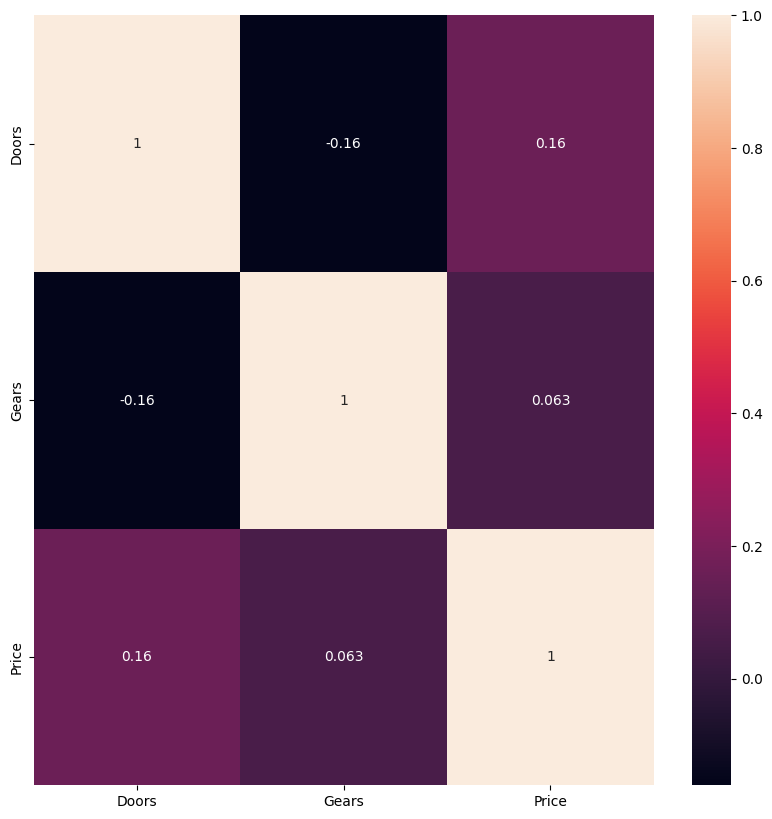

In [138]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(data2.corr(method ='kendall'),annot=True)

#### Selecting Features with having Coorelation greater than absolute(0.5) with Price 

In [139]:
#Correlation with output variable
cor = data2.corr()
cor_target = abs(cor["Price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Price    1.0
Name: Price, dtype: float64

#### No features found

### 4.3) ANOVA F score for feature selection in nominal categorical data 

#### F score method is used when the data is categorical(nominal) and numeric

#### Extracting Categorical(nominal) features

In [141]:
X=data[['Automatic', 'Met_Color', 'Mfg_Guarantee',
       'BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar','Diesel','Petrol','CNG','2002','2003','2004','2001','2000','1999','1998',
       'Blue','Silver','Black','White','Grey','Red','Green','Yellow','Violet','Beige']]
y=data['Price']

In [142]:
import sklearn.feature_selection as fs
fscore = fs.SelectKBest(k='all')
fscore.fit(X, y)
names = X.columns.values[fscore.get_support()]
scores = fscore.scores_[fscore.get_support()]
names_scores = list(zip(names, scores))
df2 = pd.DataFrame(data = names_scores, columns=
  ['Features','F_Scores'])
df2_sorted = df2.sort_values(['F_Scores','Features'], ascending =
  [False, True])
print(df2_sorted)

            Features   F_Scores
25              2003  11.567248
8    Automatic_airco  10.628842
26              2004   8.579907
24              2002   8.140343
9      Boardcomputer   6.575518
27              2001   6.437781
30              1998   5.781501
10         CD_Player   3.973778
29              1999   2.832226
7              Airco   2.562728
28              2000   2.254844
16       Sport_Model   2.063068
4                ABS   1.755650
21            Diesel   1.723086
3    BOVAG_Guarantee   1.715485
11      Central_Lock   1.672755
12   Powered_Windows   1.654499
22            Petrol   1.576214
35              Grey   1.406390
15         Mistlamps   1.400183
18      Metallic_Rim   1.397998
2      Mfg_Guarantee   1.366504
6           Airbag_2   1.357487
31              Blue   1.235048
40             Beige   1.169526
17  Backseat_Divider   1.169372
1          Met_Color   1.157701
32            Silver   1.154243
19    Radio_cassette   1.138297
14             Radio   1.135432
36      

#### Based on high F scores we would be taking 1998,2001,2002,2003,2004,Automatic_airco,Boardcomputer and CD_Player 

### 4.2) Matrix plot

### 4.2.1) Matrix Plot of Numeric variables

In [143]:
matrixdata=data[['Price', 'Age_08_04',  'KM', 'HP']]

array([[<Axes: xlabel='Price', ylabel='Price'>,
        <Axes: xlabel='Age_08_04', ylabel='Price'>,
        <Axes: xlabel='KM', ylabel='Price'>,
        <Axes: xlabel='HP', ylabel='Price'>],
       [<Axes: xlabel='Price', ylabel='Age_08_04'>,
        <Axes: xlabel='Age_08_04', ylabel='Age_08_04'>,
        <Axes: xlabel='KM', ylabel='Age_08_04'>,
        <Axes: xlabel='HP', ylabel='Age_08_04'>],
       [<Axes: xlabel='Price', ylabel='KM'>,
        <Axes: xlabel='Age_08_04', ylabel='KM'>,
        <Axes: xlabel='KM', ylabel='KM'>,
        <Axes: xlabel='HP', ylabel='KM'>],
       [<Axes: xlabel='Price', ylabel='HP'>,
        <Axes: xlabel='Age_08_04', ylabel='HP'>,
        <Axes: xlabel='KM', ylabel='HP'>,
        <Axes: xlabel='HP', ylabel='HP'>]], dtype=object)

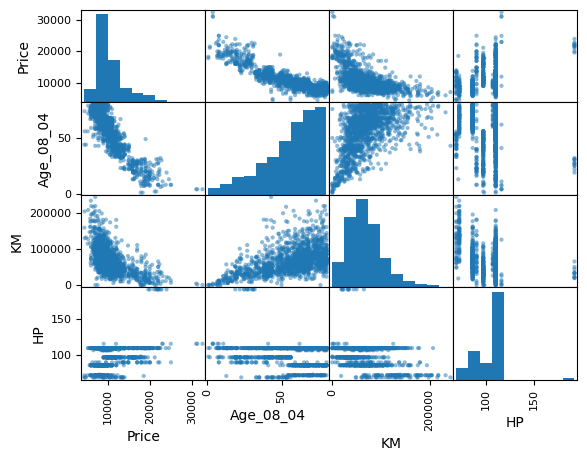

In [144]:
pd.plotting.scatter_matrix(matrixdata)

In [100]:
matrixdata1=data[['CC', 'Quarterly_Tax', 'Weight', 'Guarantee_Period']]

array([[<Axes: xlabel='CC', ylabel='CC'>,
        <Axes: xlabel='Quarterly_Tax', ylabel='CC'>,
        <Axes: xlabel='Weight', ylabel='CC'>,
        <Axes: xlabel='Guarantee_Period', ylabel='CC'>],
       [<Axes: xlabel='CC', ylabel='Quarterly_Tax'>,
        <Axes: xlabel='Quarterly_Tax', ylabel='Quarterly_Tax'>,
        <Axes: xlabel='Weight', ylabel='Quarterly_Tax'>,
        <Axes: xlabel='Guarantee_Period', ylabel='Quarterly_Tax'>],
       [<Axes: xlabel='CC', ylabel='Weight'>,
        <Axes: xlabel='Quarterly_Tax', ylabel='Weight'>,
        <Axes: xlabel='Weight', ylabel='Weight'>,
        <Axes: xlabel='Guarantee_Period', ylabel='Weight'>],
       [<Axes: xlabel='CC', ylabel='Guarantee_Period'>,
        <Axes: xlabel='Quarterly_Tax', ylabel='Guarantee_Period'>,
        <Axes: xlabel='Weight', ylabel='Guarantee_Period'>,
        <Axes: xlabel='Guarantee_Period', ylabel='Guarantee_Period'>]],
      dtype=object)

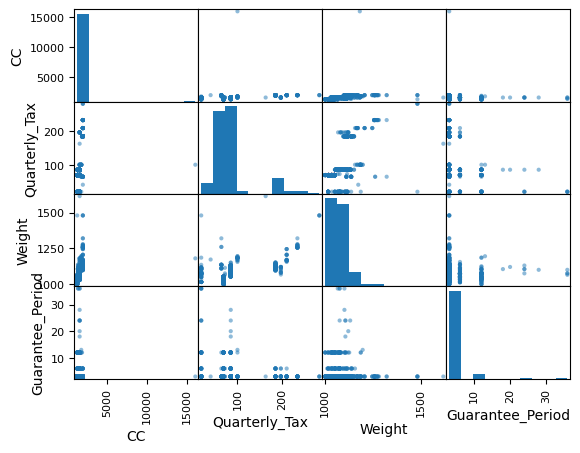

In [101]:
pd.plotting.scatter_matrix(matrixdata1)

### 4.2.2) Visualization of Categorical variables

### 4.2.1) MFG_MONTH

<Axes: xlabel='Price', ylabel='Count'>

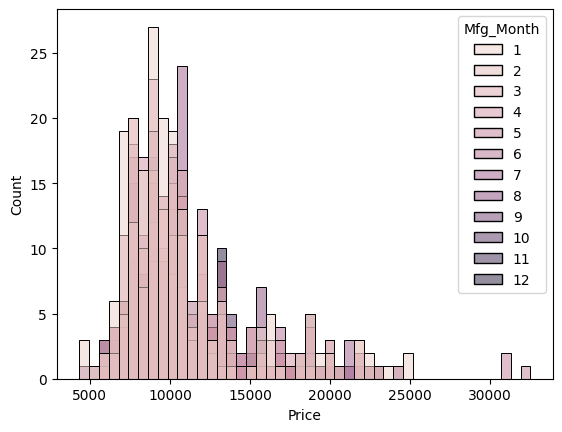

In [145]:
sns.histplot(data = data, x = "Price", hue = "Mfg_Month")

<Axes: ylabel='Price'>

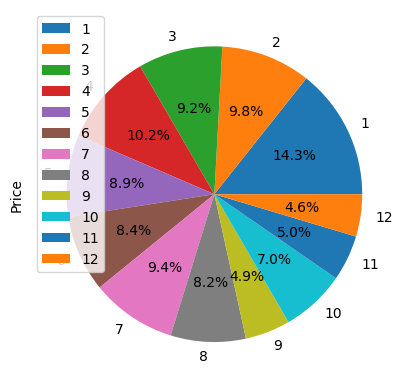

In [146]:
data. groupby(['Mfg_Month']). sum(). plot(kind='pie', y='Price',autopct='%1.1f%%')

### STEP 5) MODEL TRAINING

#### Selected features with the output variable

In [151]:
data.columns

Index(['Price', 'Age_08_04', 'Mfg_Month', 'KM', 'HP', 'Met_Color', 'Automatic',
       'CC', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfg_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar', 'CNG', 'Diesel', 'Petrol', 'Beige',
       'Black', 'Blue', 'Green', 'Grey', 'Red', 'Silver', 'Violet', 'White',
       'Yellow', '1998', '1999', '2000', '2001', '2002', '2003', '2004'],
      dtype='object')

In [152]:
x1=data[['Age_08_04','KM','Weight','Automatic_airco', 'Boardcomputer', 'CD_Player','1998',
'2001','2002','2003','2004']]
y1=data['Price']

#### Splitting the data in train and test

In [154]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = 0.30 ,random_state = 2)

#### Applying the model and computing R2,RMSE and CV

In [155]:

model = linear_model.LinearRegression()
model.fit(x1_train, y1_train)
y1_pred = model.predict(x1_test)

MSE = np.square(np.subtract(y1_test,y1_pred)).mean() 
RMSE = math.sqrt(MSE)
r2 = r2_score(y1_test, y1_pred)
cv_linear = cross_val_score(model,x1_train,y1_train)
print('RMSE for the data:',RMSE)
print('Rsquared for the data:',r2)
print("CV: ", cv_linear.mean())

RMSE for the data: 1185.7756025480853
Rsquared for the data: 0.8795836800574965
CV:  0.8787949427439108
